In [5]:
from hsdfmpm.mpm import AutofluorescenceImage, LifetimeImage, OpticalRedoxRatio, InstrumentResponseFunction
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from hsdfmpm.mpm.af.utils import truncate_colormap

# This creates the IRF model, then stores/updates it in the .hsdfm data to be reused.
InstrumentResponseFunction.load(
    path=r'\\deckard\bmeg\Rajaram-Lab\Ivers,Jesse\Codes\matlab\Toolbox\ImageProcessing\MPM_Processing\FLIM Code\IRF Files\Raw\Upright_I_IRF.sdt', reference_lifetime=0, channels=0
).store()
decay = LifetimeImage(image_path=r'E:\new df\03312025\1675NT\100\fov2_flim_755-119', channels=0)
decay.load_irf()

C:\Users\jdivers\PycharmProjects\df_poc\src\hsdfmpm\mpm\flim\flim.py:61: Warning: Loading default IRF file, 'C:\Users\jdivers\.hsdfmpm\irf\irf.pkl'.
  self.calibration = get_irf(irf)


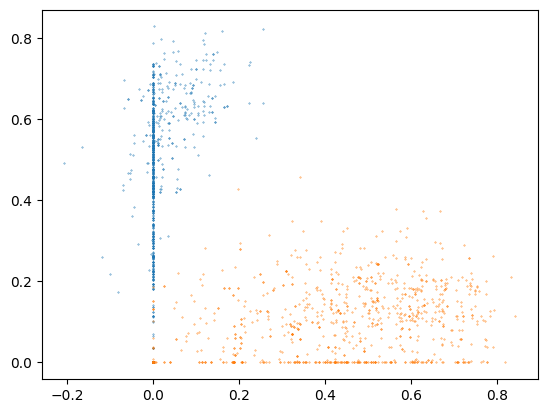

In [6]:
# LifetimeImage calibration can be explicitly loaded (calibration=<obj> or <obj>.load_irf(<path> | <obj>) or implicitly if an IRF is already stored in the .hsdfm data (as above ensures)
g, s = decay.phasor_coordinates(threshold=5, median_filter_count=1, k_size=3, correction=False)
plt.scatter(g, s, s=0.1)
g, s = decay.phasor_coordinates(threshold=5, median_filter_count=1, k_size=3, correction=True)
plt.scatter(g, s, s=0.1)
plt.show()

Lifetimes from fit. Free 0.4917ns, Bound: 25.42ns


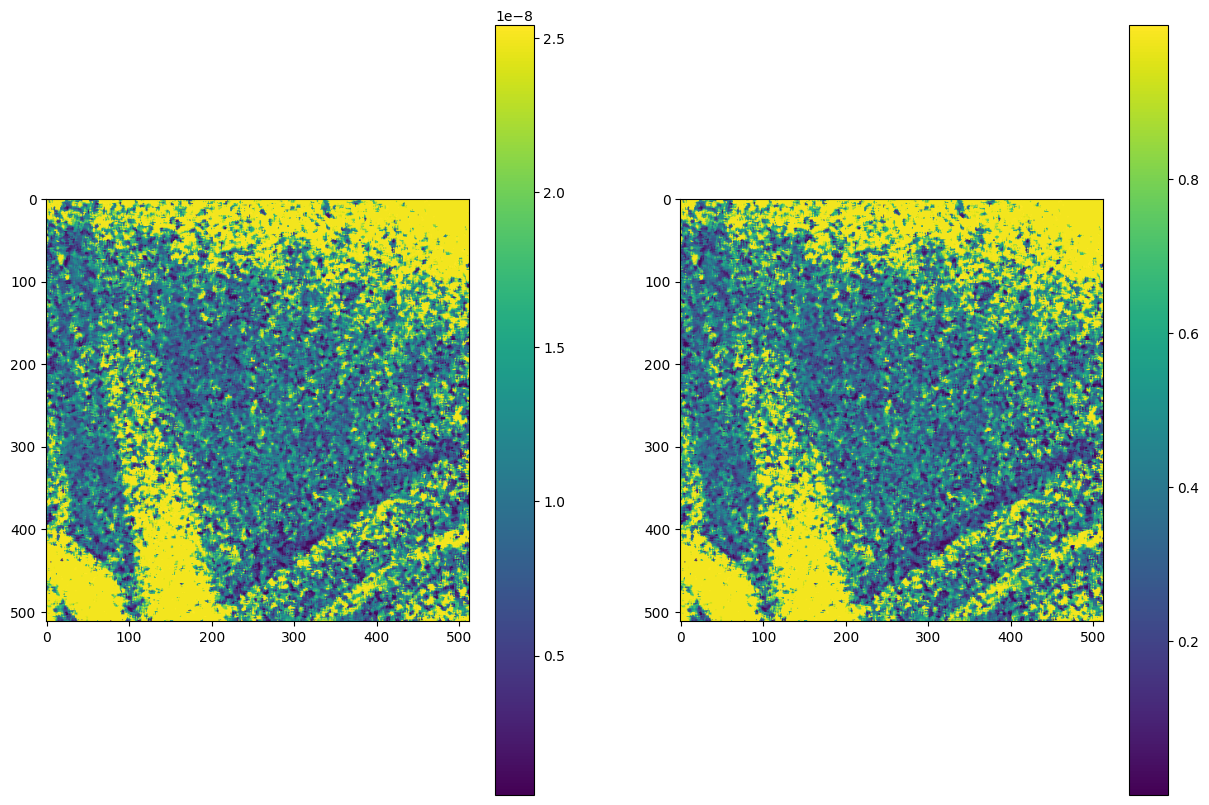

In [7]:
alphas, taum, tau = decay.fit_for_lifetime_approximations(median_filter_count=1, k_size=5)
print(f'Lifetimes from fit. Free {tau[0].item() * 1e9:.4g}ns, Bound: {tau[1].item() * 1e9:0.4g}ns')
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
im = ax[0].imshow(taum)
cb = plt.colorbar(im, ax=ax[0])
im = ax[1].imshow(alphas[1] / np.sum(alphas, axis=0))
cb = plt.colorbar(im, ax=ax[1])
plt.show()

In [8]:
ex755 = AutofluorescenceImage(image_path=r'E:\new df\03312025\1675NT\100\fov2_redox_755-120', power_file_path=r'E:\new df\03312025\power03312025.xlsx')
ex855 = AutofluorescenceImage(image_path=r'E:\new df\03312025\1675NT\100\fov2_redox_855-121', power_file_path=r'E:\new df\03312025\power03312025.xlsx')
orr = OpticalRedoxRatio(ex755=ex755, ex855=ex855)

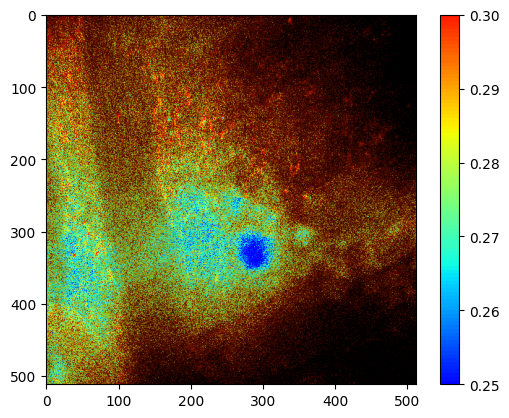

In [9]:
cmap = truncate_colormap('jet', cmin= 0.13, cmax = 0.88)
color_orr, cmap = orr.colorize(cmap, cmin=0.25, cmax=0.3)
plt.imshow(color_orr, cmap=cmap)
sm = plt.cm.ScalarMappable(norm=Normalize(vmin=0.25, vmax=0.3), cmap=cmap)
plt.colorbar(sm, ax=plt.gca())
plt.show()